Instalamos las dependencias. Es posible que nos pida reiniciar el el propio colab! Saldrá un botón de reiniciar. Una vez hecho, volveis a cargar la linia y funcionará!

In [1]:
!pip install py-dreambooth

Indicamos el directorio de nuestros datos y donde queremos que se guarde nuestro modelo. Necesario crear la carpeta de las imágenes si no la tenemos creada.

In [6]:
from py_dreambooth.dataset import LocalDataset
from py_dreambooth.model import SdDreamboothModel
from py_dreambooth.trainer import LocalTrainer
from py_dreambooth.utils.image_helpers import display_images
from py_dreambooth.utils.prompt_helpers import make_prompt

DATA_DIR = "data"  # The directory where you put your prepared photos
OUTPUT_DIR = "models"

'dataset = LocalDataset(DATA_DIR)\ndataset = dataset.preprocess_images(detect_face=True)\n\nSUBJECT_NAME = "<YOUR-NAME>"  \nCLASS_NAME = "person"\n\nmodel = SdDreamboothModel(subject_name=SUBJECT_NAME, class_name=CLASS_NAME)\ntrainer = LocalTrainer(output_dir=OUTPUT_DIR)\n\npredictor = trainer.fit(model, dataset)\n\n# Use the prompt helper to create an awesome AI avatar!\nprompt = next(make_prompt(SUBJECT_NAME, CLASS_NAME))\n\nimages = predictor.predict(\n    prompt, height=768, width=512, num_images_per_prompt=2,\n)\n\ndisplay_images(images, fig_size=10)'

Creamos el dataset e indicamos nuestro nombre

In [8]:
dataset = LocalDataset(DATA_DIR)
dataset = dataset.preprocess_images(detect_face=True)

SUBJECT_NAME = "<YOUR-NAME>"  #Incluir tu nombre sin los <>!
CLASS_NAME = "person"

A total of 8 images were found.


100%|██████████| 8/8 [00:00<00:00, 10.87it/s]

A total of 8 images were preprocessed and stored in the path 'data_preproc'.


Creamos el modelo y lo entrenamos con nuestros datos

Si se aumenta el parámetro de max_train_steps tardará más el entrenamiento (50 son 12 min aprox)

In [11]:
model = SdDreamboothModel(subject_name=SUBJECT_NAME, class_name=CLASS_NAME, max_train_steps=20)
trainer = LocalTrainer(output_dir=OUTPUT_DIR)

predictor = trainer.fit(model, dataset)

The model training has begun.
'max_train_steps' is set to 50.
The model training has ended.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The model has loaded from the directory, 'models'.


Creamos el prompt i creamos las imágenes con nuestro modelo ya entrenado

  0%|          | 0/50 [00:00<?, ?it/s]

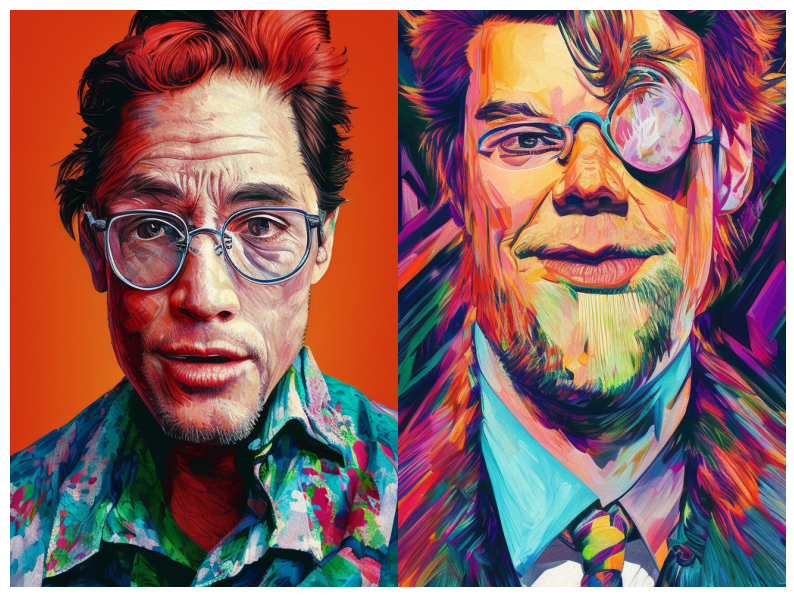

In [15]:
#prompt = next(make_prompt(SUBJECT_NAME, CLASS_NAME)) #Es para crear un prompt random!!

prompt = f"A hyper-realistic and stunning depiction of {SUBJECT_NAME} {CLASS_NAME}, capturing the person's charisma and charm, trending on Behance, intricate textures, vivid color palette, reminiscent of Alex Ross and Norman Rockwell"

images = predictor.predict(
    prompt, height=768, width=512, num_images_per_prompt=2,
)

display_images(images, fig_size=10)